##  **Dataset Selection:**

### Dataset: Bank Dataset 

In [1]:
import pandas as pd # Importing pandas for data manipulation and analysis
import numpy as np # Importing numpy for numerical operations
import matplotlib.pyplot as plt # Importing matplotlib's pyplot for plotting
%matplotlib inline
import seaborn as sns # Importing seaborn for advanced data visualization
import warnings # Suppressing warnings to keep the output clean and readable
warnings.filterwarnings('ignore')
from scipy.stats import zscore # Importing zscore from scipy.stats for standardization and outlier detection
# Importing evaluation metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
data=pd.read_csv("bank-full.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


##  **Data Preprocessing:**

#### Understanding the dataset

In [8]:
data.shape # Shape of the data

(45211, 17)

In [10]:
data.columns   # columns name of the data

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [12]:
data.info() # datatypes of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Data Preparation

In [15]:
data.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Observations:

There are no missing values in the dataset. However we could see few features like 'unknown' and 'others' for few columns. This may be the missing values outliers. This data will not be much helpful.

In [18]:
# Delete the rows which column 'poutcome' contains 'other'
other=data.poutcome=='other'
data1=data.drop(data[other].index, axis=0, inplace=False)

# Fill 'unknown' in job and education to 'other'
data1[['job','education']]=data1[['job','education']].replace(['unknown'],'other')

data1.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [20]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [22]:
data1.info(), data1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43371 non-null  int64 
 1   job        43371 non-null  object
 2   marital    43371 non-null  object
 3   education  43371 non-null  object
 4   default    43371 non-null  object
 5   balance    43371 non-null  int64 
 6   housing    43371 non-null  object
 7   loan       43371 non-null  object
 8   contact    43371 non-null  object
 9   day        43371 non-null  int64 
 10  month      43371 non-null  object
 11  duration   43371 non-null  int64 
 12  campaign   43371 non-null  int64 
 13  pdays      43371 non-null  int64 
 14  previous   43371 non-null  int64 
 15  poutcome   43371 non-null  object
 16  Target     43371 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB


(None,
                 age        balance           day      duration      campaign  \
 count  43371.000000   43371.000000  43371.000000  43371.000000  43371.000000   
 mean      40.986443    1356.963063     15.862904    258.266930      2.776671   
 std       10.595454    3030.956348      8.324122    257.950498      3.138053   
 min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
 25%       33.000000      70.000000      8.000000    103.000000      1.000000   
 50%       39.000000     443.000000     16.000000    180.000000      2.000000   
 75%       48.000000    1417.000000     21.000000    318.000000      3.000000   
 max       95.000000  102127.000000     31.000000   4918.000000     63.000000   
 
               pdays      previous  
 count  43371.000000  43371.000000  
 mean      32.158954      0.434853  
 std       90.689195      1.559405  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75

Observations:

From the above description on dataset, we can see the 5 point summary on each variables. We can see that the variable Balance consists of more outliers.

The outliers need to br dropped now. Outliers are defined as the values which are more than three standard deviations away from the mean. zscore can be used for this.

In [25]:
data1[['balance']].mean() # Calculating the mean of the 'balance' column

# Creating a new column 'balance_outliers' in 'data1' to hold the original 'balance' values
data1['balance_outliers']=data1['balance']
# Standardizing the 'balance_outliers' column using z-score normalization
data1['balance_outliers']=zscore(data1['balance_outliers'])

# Defining conditions for outliers based on z-score
condition1=(data1['balance_outliers']>3)|(data1['balance_outliers']<-3)
data2=data1.drop(data1[condition1].index, axis=0, inplace=False) # Dropping rows containing outliers based on the defined conditions
bank_data=data2.drop('balance_outliers',axis=1) # Removing the 'balance_outliers' column to obtain the final dataset without outliers

bank_data.info(), bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 42655 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42655 non-null  int64 
 1   job        42655 non-null  object
 2   marital    42655 non-null  object
 3   education  42655 non-null  object
 4   default    42655 non-null  object
 5   balance    42655 non-null  int64 
 6   housing    42655 non-null  object
 7   loan       42655 non-null  object
 8   contact    42655 non-null  object
 9   day        42655 non-null  int64 
 10  month      42655 non-null  object
 11  duration   42655 non-null  int64 
 12  campaign   42655 non-null  int64 
 13  pdays      42655 non-null  int64 
 14  previous   42655 non-null  int64 
 15  poutcome   42655 non-null  object
 16  Target     42655 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
                 age       balance           day      duration     campaign  \
 count  42655.000000  42655.000000  42655.000000  42655.000000  42655.00000   
 mean      40.937123   1079.808416     15.863299    258.173157      2.77808   
 std       10.578167   1717.623768      8.329445    257.847671      3.14056   
 min       18.000000  -6847.000000      1.000000      0.000000      1.00000   
 25%       33.000000     66.000000      8.000000    103.000000      1.00000   
 50%       39.000000    425.000000     16.000000    180.000000      2.00000   
 75%       48.000000   1341.000000     21.000000    318.000000      3.00000   
 max       95.000000  10443.000000     31.000000   4918.000000     63.00000   
 
               pdays      previous  
 count  42655.000000  42655.000000  
 mean      32.210855      0.434885  
 std       90.856368      1.563589  
 min       -1.000000      0.000000  
 25%       -1.000000      0.000000  
 50%       -1.000000      0.000000  
 75%       -1.000000 

##  **Visualization:**

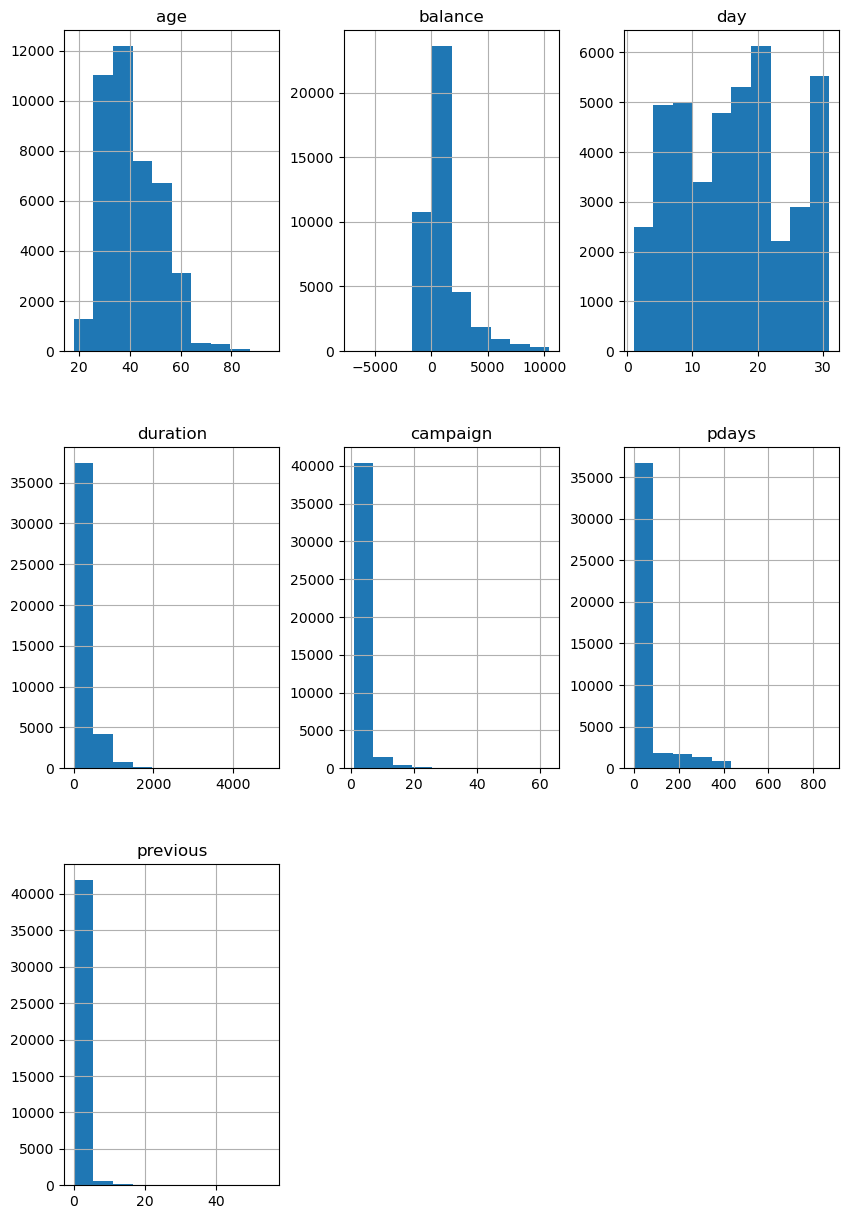

In [28]:
bank_data.hist(figsize=(10,15))
plt.show()

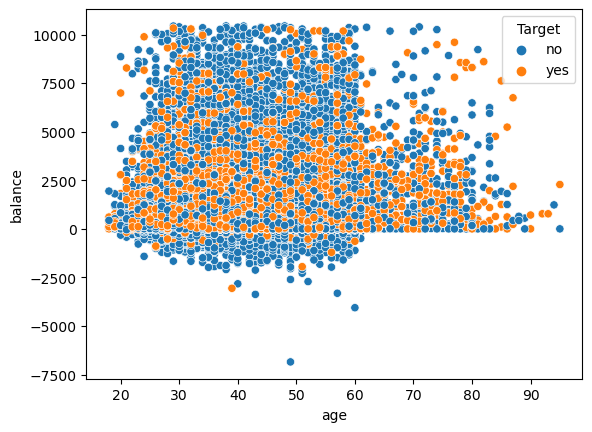

In [30]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(x='age',y='balance',hue='Target',data=bank_data)
plt.show()

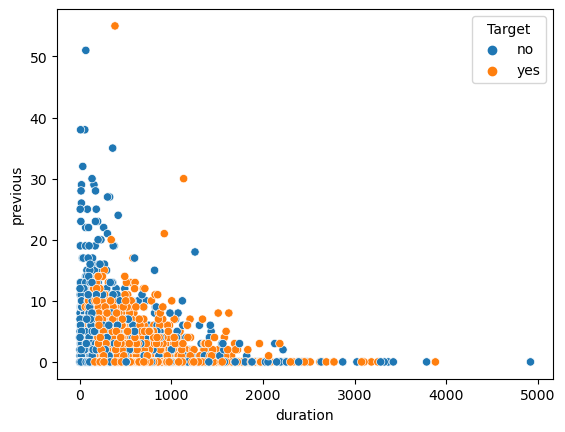

In [32]:
sns.scatterplot(x='duration',y='previous',hue='Target',data=bank_data)
plt.show()

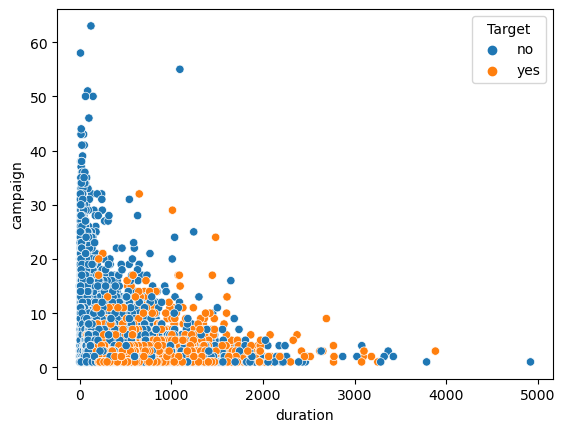

In [34]:
sns.scatterplot(x='duration',y='campaign',hue='Target',data=bank_data)
plt.show()

Observations:

From the above graphs, we can interpret for each variables.

- Age : The clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s. It has a normal distribution. Between 25 to 40 of age is more likely to subscribe the bank.

- Balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

- Duration: It is left-skewed indicates that most calls are relatively short. Also, there is a large number of outliers.

- Campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact

From the graph between campaign (number of calls made) vs duration, we can see that the clients have subscribed with less number of calls. With increase in number of calls, there is no much subscription. This should also be noted as more of number calls might result in losing the clients.

<Figure size 1000x700 with 0 Axes>

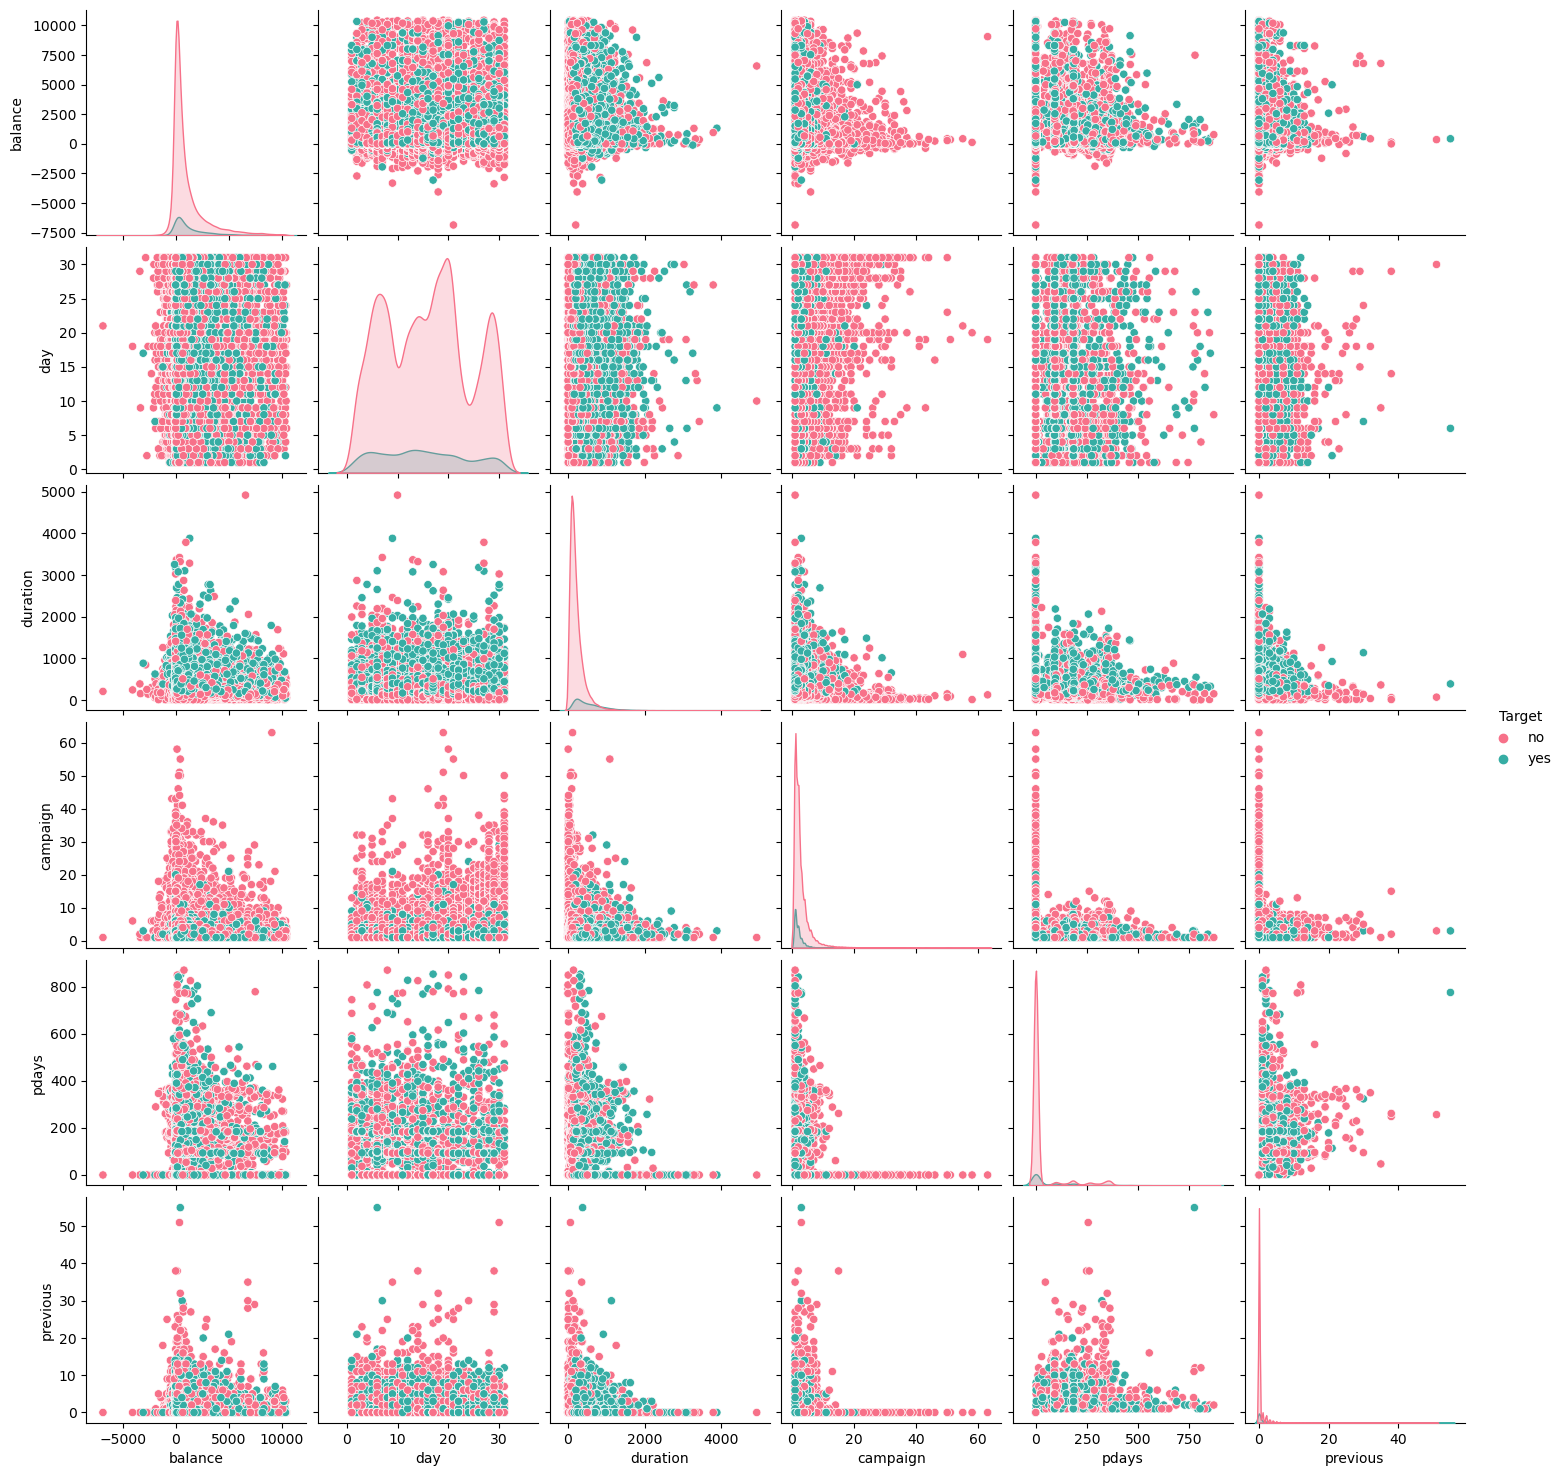

In [36]:
plt.figure(figsize=(10,7))
sns.pairplot(bank_data.iloc[:,1:], hue='Target', palette='husl')

In [38]:
# select only the numeric columns
numeric_columns = bank_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

print(corr)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.105504 -0.010668 -0.006064  0.004580 -0.006096  0.014026
balance   0.105504  1.000000  0.009472  0.035927 -0.022389  0.016910  0.038031
day      -0.010668  0.009472  1.000000 -0.032865  0.169848 -0.088887 -0.055350
duration -0.006064  0.035927 -0.032865  1.000000 -0.083199  0.000181  0.005692
campaign  0.004580 -0.022389  0.169848 -0.083199  1.000000 -0.094046 -0.051426
pdays    -0.006096  0.016910 -0.088887  0.000181 -0.094046  1.000000  0.568111
previous  0.014026  0.038031 -0.055350  0.005692 -0.051426  0.568111  1.000000


<Axes: >

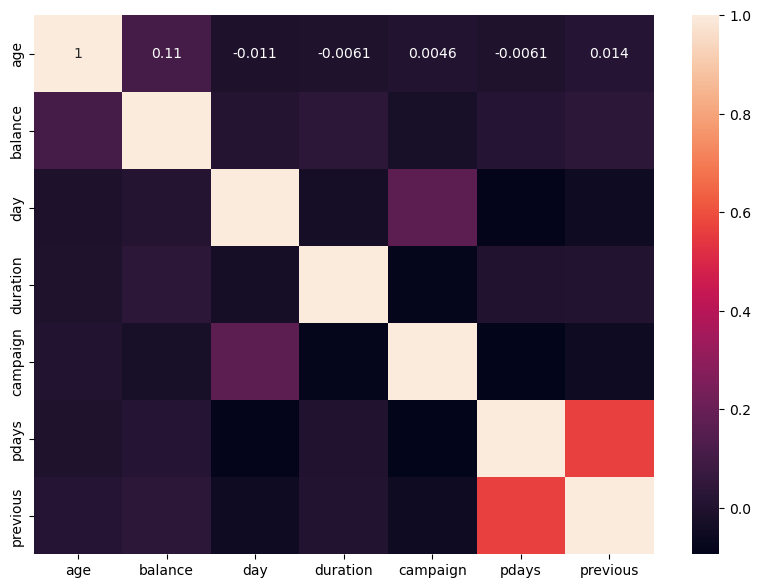

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

Observations:

From the pairplots, we can see that there is no clear relationship between the variables age, balance, duration and campaign.

From the heat map of correlation matrix, we can observe that “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”

## Transformation of Data

In [44]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [46]:
# Classfication models, Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns:
    if bank_data[feature].dtype=='object':  # Only apply for columns with categorical string
        bank_data[feature]=pd.Categorical(bank_data[feature]).codes

bank_data.info(), bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 42655 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        42655 non-null  int64
 1   job        42655 non-null  int8 
 2   marital    42655 non-null  int8 
 3   education  42655 non-null  int8 
 4   default    42655 non-null  int8 
 5   balance    42655 non-null  int64
 6   housing    42655 non-null  int8 
 7   loan       42655 non-null  int8 
 8   contact    42655 non-null  int8 
 9   day        42655 non-null  int64
 10  month      42655 non-null  int8 
 11  duration   42655 non-null  int64
 12  campaign   42655 non-null  int64
 13  pdays      42655 non-null  int64
 14  previous   42655 non-null  int64
 15  poutcome   42655 non-null  int8 
 16  Target     42655 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.0 MB


(None,
                 age           job       marital     education       default  \
 count  42655.000000  42655.000000  42655.000000  42655.000000  42655.000000   
 mean      40.937123      4.693565      1.165092      2.054882      0.018685   
 std       10.578167      3.667607      0.607301      0.778312      0.135411   
 min       18.000000      0.000000      0.000000      0.000000      0.000000   
 25%       33.000000      1.000000      1.000000      2.000000      0.000000   
 50%       39.000000      4.000000      1.000000      2.000000      0.000000   
 75%       48.000000      8.000000      2.000000      3.000000      0.000000   
 max       95.000000     11.000000      2.000000      3.000000      1.000000   
 
             balance       housing          loan       contact           day  \
 count  42655.000000  42655.000000  42655.000000  42655.000000  42655.000000   
 mean    1079.808416      0.553909      0.162724      0.663627     15.863299   
 std     1717.623768      0.497

In [48]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

## Model Building

### Splitting of data into training and test datasets

In [52]:
from sklearn.model_selection import train_test_split # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

In [54]:
X=bank_data.drop(['contact','Target'],axis=1)
y=bank_data['Target']

# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

### Scaling of data to improve the accuracy

In [57]:
# To have an accurate score, let us create another set of data with scaling function applied to it.
ZX=preprocessing.scale(X)
ZX_train,ZX_test,y_train,y_test=train_test_split(ZX,y,test_size=0.3,random_state=10)

### Implement the models

### 1) Decision Tree Model

In [61]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 
from sklearn.tree import DecisionTreeClassifier

data_model=DecisionTreeClassifier(criterion='entropy')
data_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

- Print the accuracy of the model and print the confusion matrix

In [64]:
test_pred=data_model.predict(X_test)

data_modelscore= data_model.score(X_test , y_test)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')
cm = confusion_matrix(y_test, test_pred)

print('Decision Tree Model accuracy:',data_modelscore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix of Decision Tree:')
print(metrics.confusion_matrix(y_test,test_pred))

Decision Tree Model accuracy: 0.8759865593498476
Precision: 0.8764532081890019
Recall: 0.8759865593498476
F1 Score: 0.8762185790870196
Confusion Matrix of Decision Tree:
[[10498   800]
 [  787   712]]


#### Feature Importance

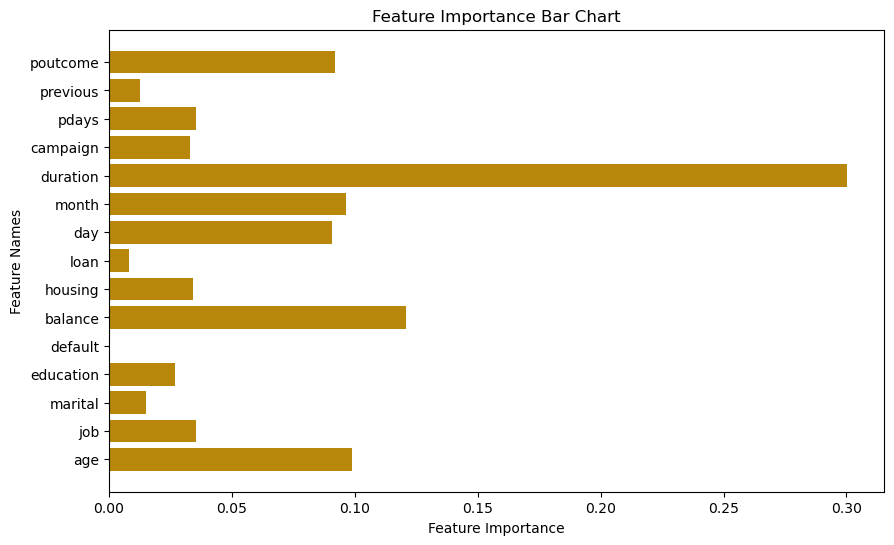

In [67]:
#The feature_importances_ attribute in a DecisionTreeClassifier provides a measure of the importance of each feature in the training process.
feature_importances=data_model.feature_importances_
features= X_train.columns
plt.figure(figsize=(10,6))
plt.barh(features,feature_importances,color='darkgoldenrod')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

### 2) Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

rflc=RandomForestClassifier(criterion='entropy',class_weight={0:.5,1:.5},max_depth = 5,min_samples_leaf=5)
rflc=rflc.fit(X_train,y_train)

test_pred=rflc.predict(X_test)

rflc_score=rflc.score(X_test,y_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print('Random Forest Model accuracy:',rflc_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix of Random Forest:')
print(metrics.confusion_matrix(y_test,test_pred))

Random Forest Model accuracy: 0.8941939517074314
Precision: 0.886900602728418
Recall: 0.8941939517074314
F1 Score: 0.8579232847324267
Confusion Matrix of Random Forest:
[[11258    40]
 [ 1314   185]]


#### Feature Importance

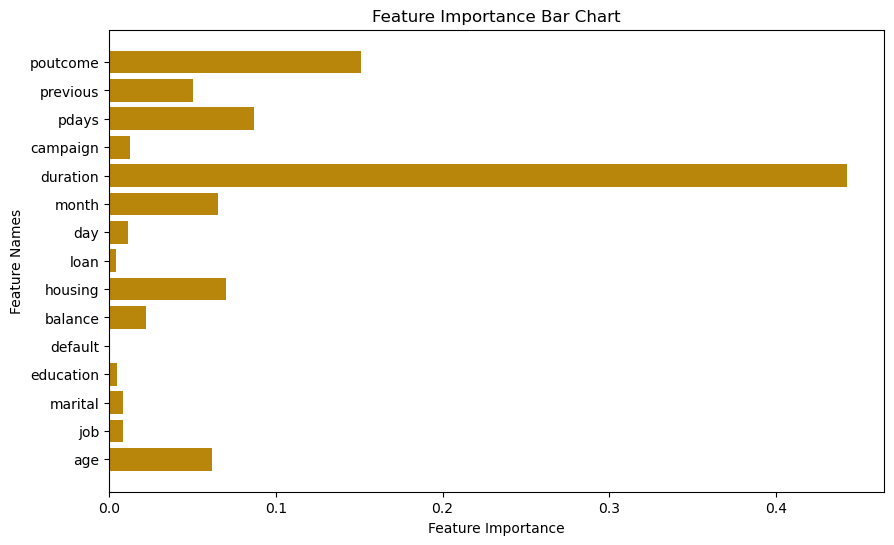

In [72]:
feature_importances=rflc.feature_importances_
features= X_train.columns
plt.figure(figsize=(10,6))
plt.barh(features,feature_importances,color='darkgoldenrod')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

### 3) Adaboost Ensemble Algorithm

In [76]:
from sklearn.ensemble import AdaBoostClassifier

abcl=AdaBoostClassifier(n_estimators=20)
abcl=abcl.fit(X_train,y_train)

test_pred=abcl.predict(X_test)

abcl_score=abcl.score(X_test,y_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print('AdaBoost Ensemble Model accuracy:',abcl_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix of AdaBoost Ensemble Model:')
print(metrics.confusion_matrix(y_test,test_pred))

AdaBoost Ensemble Model accuracy: 0.8924747987809643
Precision: 0.8742994245798857
Recall: 0.8924747987809643
F1 Score: 0.8780509752719903
Confusion Matrix of AdaBoost Ensemble Model:
[[10954   344]
 [ 1032   467]]


#### Feature Importance

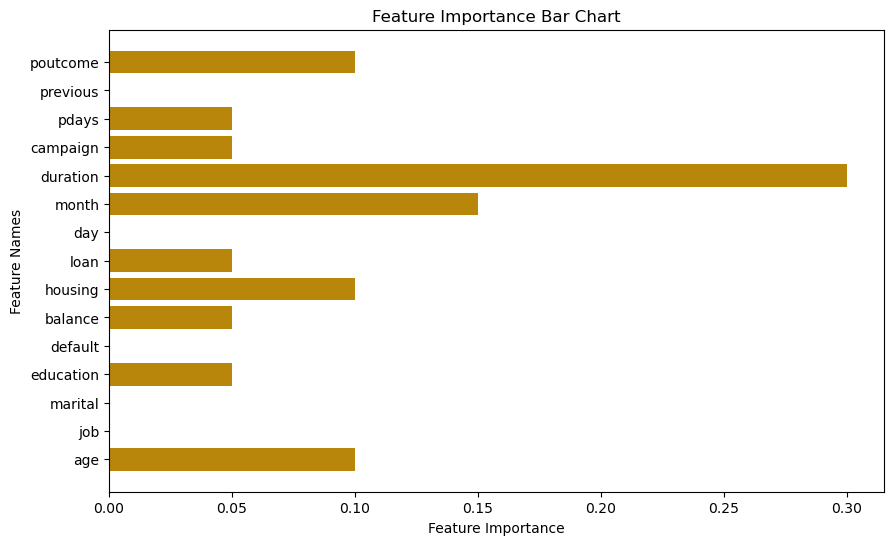

In [79]:
feature_importances=abcl.feature_importances_
features= X_train.columns
plt.figure(figsize=(10,6))
plt.barh(features,feature_importances,color='darkgoldenrod')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

### 4) Bagging Classifier Algorithm

In [82]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

test_pred = bgcl.predict(X_test)

bgcl_score=bgcl.score(X_test, y_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print('Bagging Classifier Model accuracy:',bgcl_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix of Bagging Classifier Model:')
print(metrics.confusion_matrix(y_test,test_pred))

Bagging Classifier Model accuracy: 0.898804407282957
Precision: 0.8856323165797354
Recall: 0.898804407282957
F1 Score: 0.889075412036703
Confusion Matrix of Bagging Classifier Model:
[[10916   382]
 [  913   586]]


#### Feature Importance

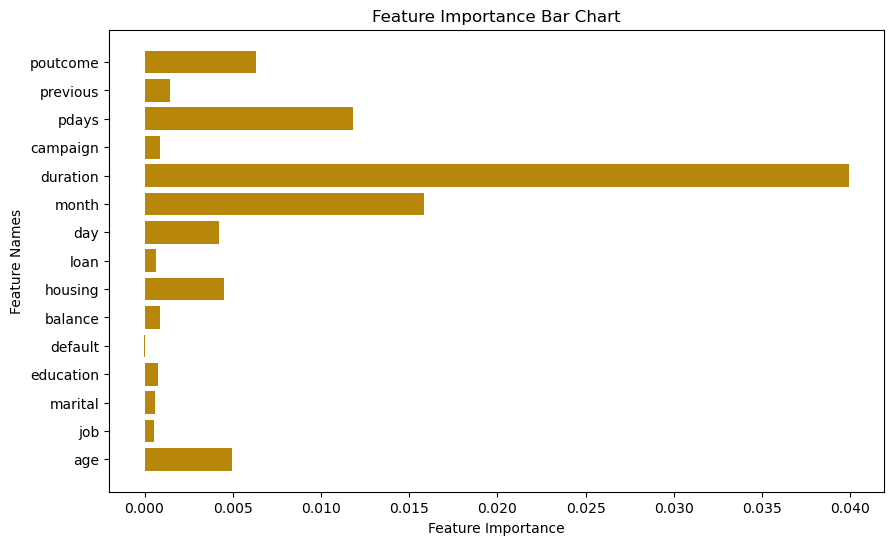

In [89]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(bgcl, X_test, y_test, n_repeats=10, random_state=42)

# Extract importances
feature_importances = result.importances_mean
feature=X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature, feature_importances,color='darkgoldenrod')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

### 5) GradientBoost Classifier Algorithm

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print('Gradient Boost Classifier Model accuracy:',gbcl_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix of Gradient Boost Classifier Model:')
print(metrics.confusion_matrix(y_test,test_pred))

Gradient Boost Classifier Model accuracy: 0.8987262639681175
Precision: 0.8834944660993662
Recall: 0.8987262639681175
F1 Score: 0.8744318114660441
Confusion Matrix of Gradient Boost Classifier Model:
[[11165   133]
 [ 1163   336]]


#### Feature Importance

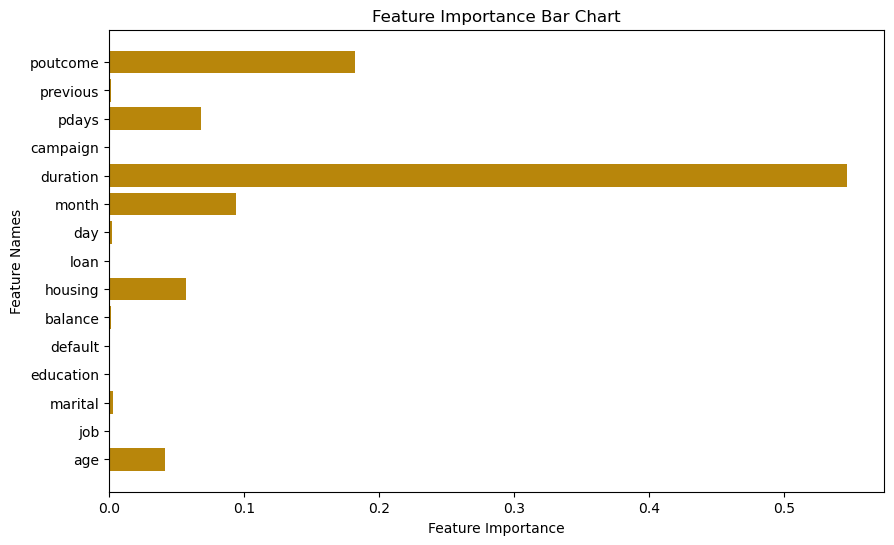

In [95]:
feature_importances=gbcl.feature_importances_
features= X_train.columns
plt.figure(figsize=(10,6))
plt.barh(features,feature_importances,color='darkgoldenrod')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

## Voting Classifier

In [98]:
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(("DTC",DecisionTreeClassifier()))
estimators.append(("RFC",RandomForestClassifier()))
estimators.append(("ABC",AdaBoostClassifier()))
estimators.append(("BGC",BaggingClassifier()))
estimators.append(("GBC",GradientBoostingClassifier()))


vc_hard = VotingClassifier(estimators = estimators, voting="hard")
vc_hard.fit(X_train, y_train)
y_pred = vc_hard.predict(X_test)

def add_readings_model(model_name, y_test, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print or store the metrics
    print('Model:',model_name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:')
    print(cm)

add_readings_model("Voting Classifier",y_test,y_pred)

Model: Voting Classifier
Accuracy: 0.9050558724701102
Precision: 0.8921942787715512
Recall: 0.9050558724701102
F1 Score: 0.8934550976828531
Confusion Matrix:
[[11011   287]
 [  928   571]]


## Comparision of Models

In [100]:
compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 
                                  'Adaboost Ensemble Algorithm','Bagging Classifier Algorithm', 
                                  'GradientBoost Classifier Algorithm'], 
                        
                        'Accuracy': [data_modelscore, rflc_score, abcl_score, 
                                     bgcl_score, gbcl_score]})

compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Bagging Classifier Algorithm,0.898804
4,GradientBoost Classifier Algorithm,0.898726
1,Random Forest,0.894194
2,Adaboost Ensemble Algorithm,0.892475
0,Decision Tree,0.875987
